In [ ]:
#!pip install kaggle

In [ ]:
!pip install kagglehub

In [ ]:
#!pip install --upgrade numpy

In [ ]:
#! pip install -- gensim

In [ ]:
#! pip install --upgrade gensim

In [1]:
#Importing libraries and modules (will be updated as I need more of them)
import torch #Link for Pytorch documentation: https://pytorch.org/docs/stable/index.html
from torch import nn #Module for neural networks
from torch.nn import Module #Loss function (?)
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence #pad every batch so they are the same length

import sklearn
from sklearn import datasets #For creating dataset tables
from sklearn import ensemble #Maybe need this? Model for structured data like Excel spreadsheets
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np

import os #for file paths
import spacy #for tokenization ** torchtext is no longer available **

import torchvision #For ComputerVision
from torchvision import datasets
from torchvision.transforms import ToTensor

from zipfile import ZipFile

import pandas as pd
import matplotlib.pyplot as plt
import csv
import requests
from pathlib import Path
from transformers import pipeline
from google.colab import files
import string
import re
import unicodedata


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import random
import scipy
from scipy.stats import norm
import shutil

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qiuchen22335","key":"ba8e58ff5bcdf619f8f1cc4fc1a12985"}'}

In [3]:
#Creates .kaggle folder
os.makedirs("/root/.kaggle", exist_ok =True)
#Moves file into kaggle folder
os.rename("kaggle.json", "/root/.kaggle/kaggle.json") #Reupload file again if error

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#Download the dataset (This is a cleaned up version from the original dataset found at: )
!kaggle datasets download -d 510-project-letterboxd-cleaned --force

Dataset URL: https://www.kaggle.com/datasets/qiuchen22335/510-project-letterboxd-cleaned
License(s): unknown
  0% 0.00/3.97M [00:00<?, ?B/s]
100% 3.97M/3.97M [00:00<00:00, 835MB/s]


In [6]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("qiuchen22335/510-project-letterboxd-cleaned")

print("Path to dataset files:", path)

100%|██████████| 3.97M/3.97M [00:00<00:00, 139MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/qiuchen22335/510-project-letterboxd-cleaned/versions/3


In [7]:
f= os.listdir(path)
print(f)

['extra_dataset.csv', 'movies_dataset.csv', 'genre_dataset.csv']


In [8]:
from pathlib import Path
path = Path('/root/.cache/kagglehub/datasets/qiuchen22335/510-project-letterboxd-cleaned/versions/3')

#unzip zip file
zipfile = ZipFile('/content/510-project-letterboxd-cleaned.zip', 'r')
zipfile.extractall('Extracted_Files')

movies_csv = Path('/content/Extracted_Files/movies_dataset.csv')
genres_csv = Path('/content/Extracted_Files/genre_dataset.csv')
extra_dataset = Path('content/Extracted_Files/extra_dataset.csv')

In [9]:
genres_df = pd.read_csv(genres_csv)
movies_df = pd.read_csv(movies_csv)

In [10]:
genres_merge_id = genres_df.groupby('id').agg(lambda x: x.tolist())
genres_merge_id.head()
merged_df = pd.merge(movies_df, genres_merge_id, on='id', how = 'inner')
merged_df.head()

,id,name,date,tagline,description,minute,rating,genre
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]"
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]"
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]"
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama]
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]"


In [ ]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(filenames)} in the dataset: {filenames}')
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")
walk_through_dir(path)
#Disregard theh xlsx files, they were mistakenly saved as that rather than .csv
#Correct files!

There are 3 in the dataset: ['extra_dataset.csv', 'movies_dataset.csv', 'genre_dataset.csv']
There are 0 directories and 3 files in '/root/.cache/kagglehub/datasets/qiuchen22335/510-project-letterboxd-cleaned/versions/3'.


In [ ]:
genres_df.head()

,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama


In [ ]:
#create a dictionary that assigns each films id to their respective list of genres
#csv reader built with help from w3schools, https://stackoverflow.com/questions/6740918/creating-a-dictionary-from-a-csv-file
movie_genre_dict = {}
with open(Path('/content/Extracted_Files/genre_dataset.csv')) as genres:
    genre_reader = csv.reader(genres)
    next(genre_reader, None)
    for row in genre_reader:
        if row[0] not in movie_genre_dict:
            value_list = []
            value_list.append(row[1])
            movie_genre_dict[row[0]] = value_list
        else:
            value_list.append(row[1])
print(dict(list(movie_genre_dict.items())))
#Output: Films associated with their genres!

#Film ID List
film_id_key_list = []
for film_id in movie_genre_dict:
    film_id_key_list.append(film_id)

{'1000001': ['Comedy', 'Adventure'], '1000002': ['Comedy', 'Thriller', 'Drama'], '1000003': ['Science Fiction', 'Adventure', 'Comedy', 'Action'], '1000004': ['Drama'], '1000005': ['Drama', 'Comedy', 'Music', 'Romance'], '1000006': ['Drama', 'History'], '1000007': ['Science Fiction', 'Drama', 'Adventure'], '1000008': ['Crime', 'Drama', 'Thriller'], '1000009': ['Science Fiction', 'Adventure'], '1000010': ['Crime', 'Thriller'], '1000011': ['Adventure', 'Animation', 'Science Fiction', 'Action'], '1000012': ['Drama', 'Music'], '1000013': ['Crime', 'Mystery', 'Thriller'], '1000014': ['Horror', 'Mystery', 'Thriller'], '1000015': ['Mystery', 'Comedy', 'Crime'], '1000016': ['Mystery', 'Drama', 'Horror'], '1000017': ['Action', 'Drama', 'Thriller', 'Crime'], '1000018': ['Action', 'Adventure', 'Science Fiction'], '1000019': ['Comedy', 'Drama', 'Thriller'], '1000020': ['Romance', 'Science Fiction', 'Comedy'], '1000021': ['Animation', 'Adventure', 'Science Fiction', 'Action'], '1000022': ['Comedy', 

In [ ]:
description_col = movies_df['description'].astype("string")
description_col.head()

,description
0,Barbie and Ken are having the time of their li...
1,"All unemployed, Ki-taek's family takes peculia..."
2,An aging Chinese immigrant is swept up in an i...
3,A ticking-time-bomb insomniac and a slippery s...
4,"Mia, an aspiring actress, serves lattes to mov..."


In [ ]:
movie_genre_dict

{'1000001': ['Comedy', 'Adventure'],
 '1000002': ['Comedy', 'Thriller', 'Drama'],
 '1000003': ['Science Fiction', 'Adventure', 'Comedy', 'Action'],
 '1000004': ['Drama'],
 '1000005': ['Drama', 'Comedy', 'Music', 'Romance'],
 '1000006': ['Drama', 'History'],
 '1000007': ['Science Fiction', 'Drama', 'Adventure'],
 '1000008': ['Crime', 'Drama', 'Thriller'],
 '1000009': ['Science Fiction', 'Adventure'],
 '1000010': ['Crime', 'Thriller'],
 '1000011': ['Adventure', 'Animation', 'Science Fiction', 'Action'],
 '1000012': ['Drama', 'Music'],
 '1000013': ['Crime', 'Mystery', 'Thriller'],
 '1000014': ['Horror', 'Mystery', 'Thriller'],
 '1000015': ['Mystery', 'Comedy', 'Crime'],
 '1000016': ['Mystery', 'Drama', 'Horror'],
 '1000017': ['Action', 'Drama', 'Thriller', 'Crime'],
 '1000018': ['Action', 'Adventure', 'Science Fiction'],
 '1000019': ['Comedy', 'Drama', 'Thriller'],
 '1000020': ['Romance', 'Science Fiction', 'Comedy'],
 '1000021': ['Animation', 'Adventure', 'Science Fiction', 'Action'],
 '

In [ ]:
from itertools import permutations
#https://docs.vultr.com/python/built-in/frozenset

permutations_dictionary = {} #create an empty dictionary to store values
unique_combinations_dictionary ={}
for key, value in movie_genre_dict.items():
  permutations_dictionary[key] = list(permutations(value, 2)) #setting 2 for co-occurrence matrix. However, this gives repeats too!
  unique_permutations = {frozenset(pair) for pair in permutations(value, 2)} #Using the frozenset method to remove duplicates
  unique_combinations_dictionary[key] = [tuple(pair) for pair in unique_permutations] #converting back into a list for each pairing with genre ID

print(unique_combinations_dictionary)

{'1000001': [('Adventure', 'Comedy')], '1000002': [('Thriller', 'Drama'), ('Drama', 'Comedy'), ('Thriller', 'Comedy')], '1000003': [('Adventure', 'Comedy'), ('Adventure', 'Science Fiction'), ('Action', 'Comedy'), ('Science Fiction', 'Comedy'), ('Adventure', 'Action'), ('Action', 'Science Fiction')], '1000004': [], '1000005': [('Romance', 'Comedy'), ('Music', 'Comedy'), ('Drama', 'Comedy'), ('Romance', 'Music'), ('Romance', 'Drama'), ('Music', 'Drama')], '1000006': [('History', 'Drama')], '1000007': [('Adventure', 'Science Fiction'), ('Drama', 'Science Fiction'), ('Adventure', 'Drama')], '1000008': [('Thriller', 'Crime'), ('Thriller', 'Drama'), ('Drama', 'Crime')], '1000009': [('Adventure', 'Science Fiction')], '1000010': [('Thriller', 'Crime')], '1000011': [('Animation', 'Science Fiction'), ('Animation', 'Action'), ('Adventure', 'Science Fiction'), ('Animation', 'Adventure'), ('Adventure', 'Action'), ('Action', 'Science Fiction')], '1000012': [('Music', 'Drama')], '1000013': [('Thrille

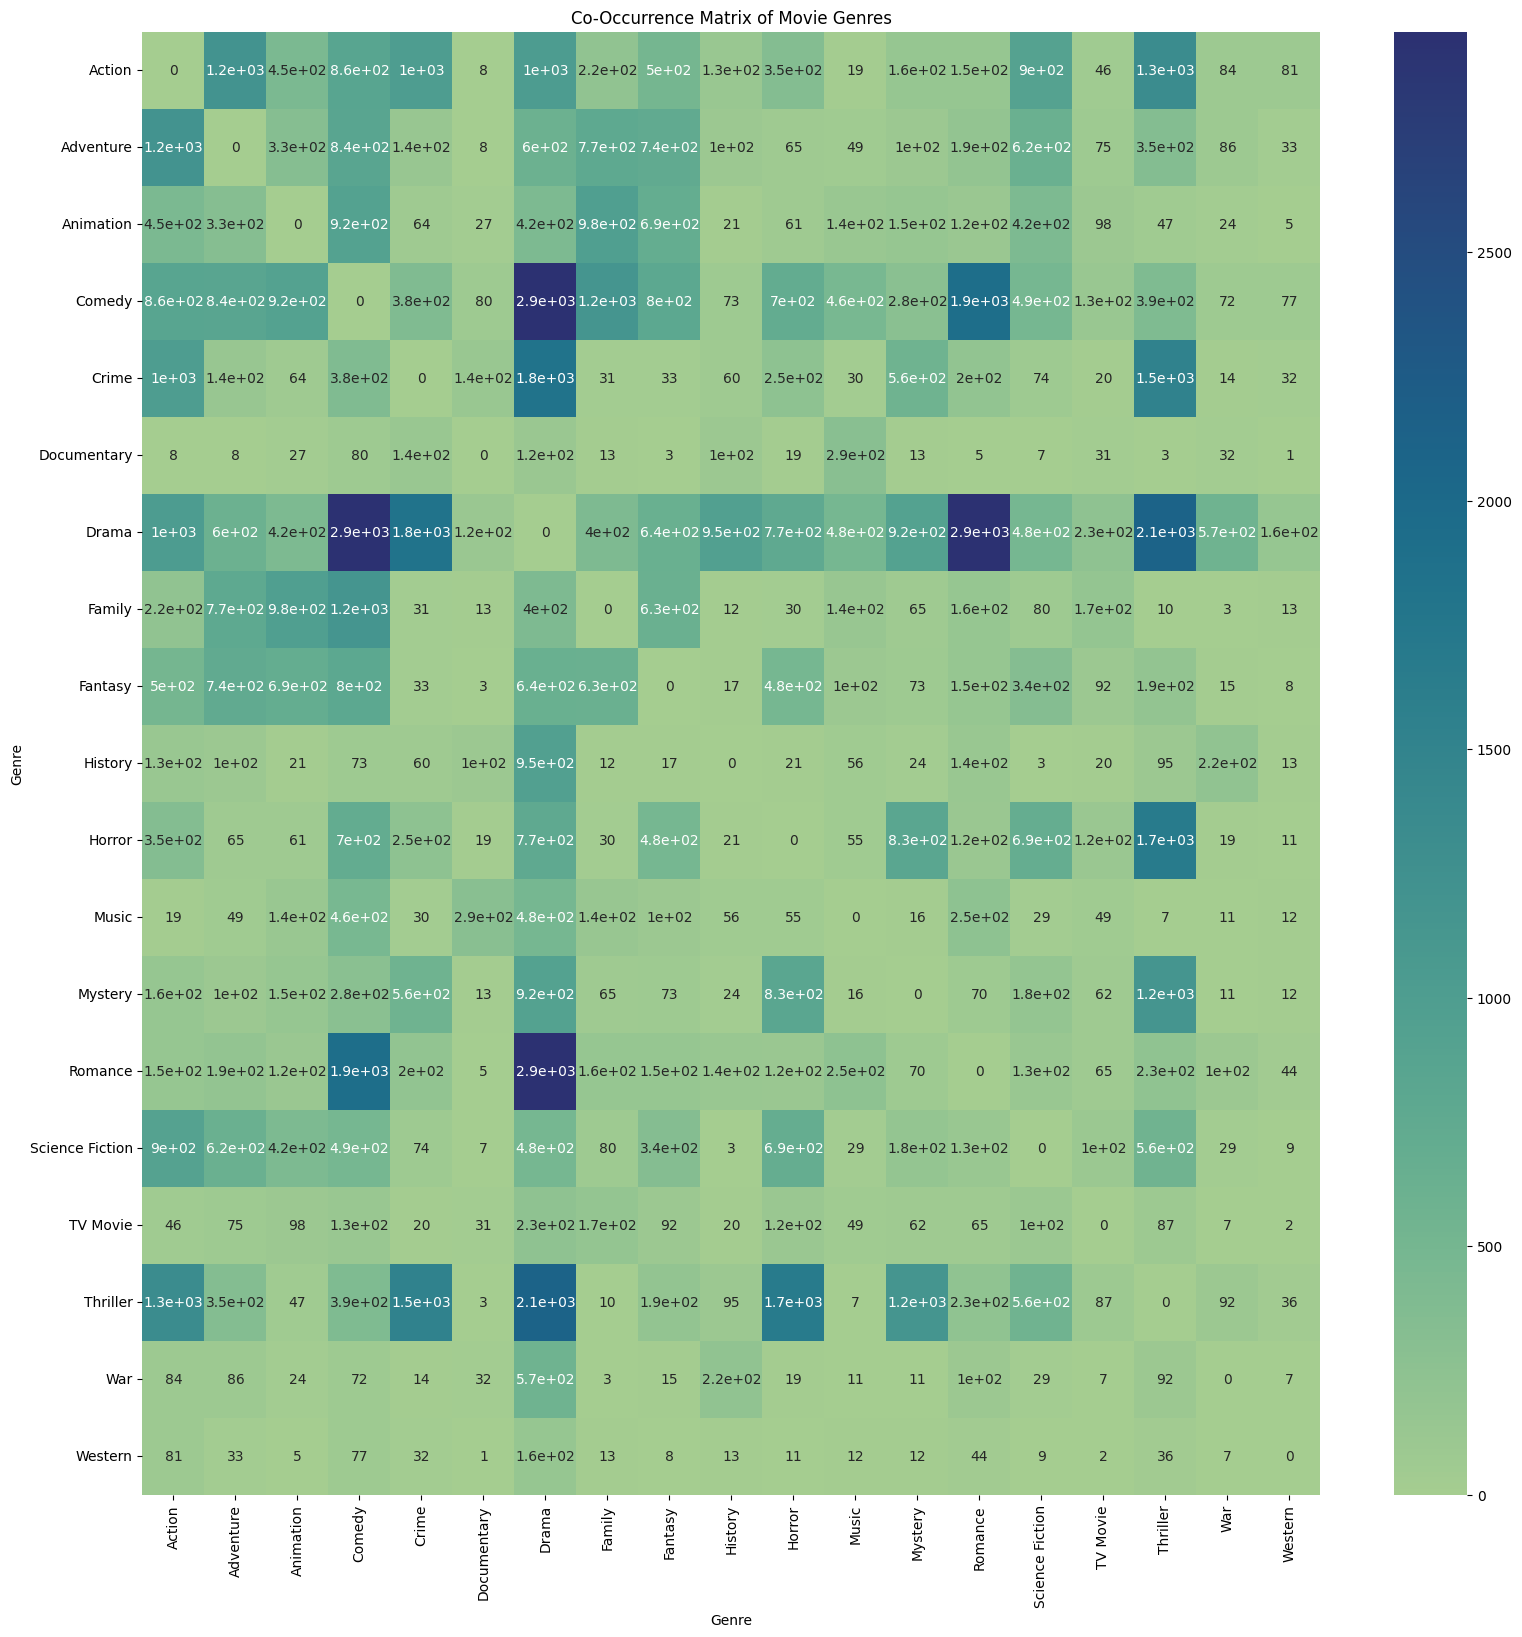

In [ ]:
#https://docs.python.org/3/library/collections.html#collections.defaultdict
#Using defaultdict() since the genres are single values that aren't contextual like description data are
from collections import defaultdict

co_occurrence_count = []
d = defaultdict(int)

for value in unique_combinations_dictionary.values():
  for genre_combination in value: #have to use second loop to iterate through EACH combination in EACH value  (for example, each pair in [('Drama', 'Thriller'), ('Thriller', 'Comedy'), ('Drama', 'Comedy')])
    d[tuple(genre_combination)] += 1 #have to use tuples since each permutation is creates multiple items in a single list in the dictionary. Counts the occurrence of each permutation in entire list of movies

co_occurrence_count = sorted(d.items())

unique_genre =set() #creating a set from the iterable
for genre_pair, _ in co_occurrence_count:
  unique_genre.update(genre_pair) #update used to insert specified items into the dictionary

unique_genres = sorted(unique_genre)

#Converting co-occurrence into a dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
co_occurrence_matrix = pd.DataFrame(0, index= unique_genres, columns = unique_genres)

#Co-occurrence Matrix plotting using Seaborn Heatmap
import seaborn as sns
for genre_pair, count in co_occurrence_count:
  genre1, genre2 = genre_pair
  co_occurrence_matrix.loc[genre1, genre2] = count
  co_occurrence_matrix.loc[genre2, genre1] = count #symmetrical for co-occurrence matrices

plt.figure(figsize=(19,19))
sns.heatmap(co_occurrence_matrix, annot=True, cmap = 'crest')
plt.title('Co-Occurrence Matrix of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Genre')

plt.savefig('Co-Occurrence Matrix of Movie Genres.png', dpi = 300)

#We can see that the highest combinations are with (Comedy, Drama), (Drama, Romance), and (Drama, Thriller)
#The lowest combinations are (Documentary, Western), (Documentary, Thriller), and (History, Science Fiction)

In [ ]:
co_occurrence_matrix #dataframe

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Action,0,1204,448,859,1001,8,1033,217,505,132,354,19,157,150,901,46,1336,84,81
Adventure,1204,0,333,842,141,8,598,774,742,101,65,49,103,186,621,75,354,86,33
Animation,448,333,0,918,64,27,415,976,690,21,61,137,152,119,422,98,47,24,5
Comedy,859,842,918,0,384,80,2944,1169,804,73,702,464,283,1914,486,129,392,72,77
Crime,1001,141,64,384,0,137,1818,31,33,60,247,30,564,203,74,20,1536,14,32
Documentary,8,8,27,80,137,0,125,13,3,101,19,291,13,5,7,31,3,32,1
Drama,1033,598,415,2944,1818,125,0,404,641,948,769,483,918,2931,484,230,2110,566,157
Family,217,774,976,1169,31,13,404,0,626,12,30,138,65,158,80,174,10,3,13
Fantasy,505,742,690,804,33,3,641,626,0,17,484,102,73,154,337,92,187,15,8
History,132,101,21,73,60,101,948,12,17,0,21,56,24,136,3,20,95,216,13


In [ ]:
from collections import Counter #count genres
genre_list = [genre for sublist in movie_genre_dict.values() for genre in sublist]
genre_list_counter = Counter(genre_list)

genre_count_df = pd.DataFrame.from_dict(genre_list_counter, orient='index', columns = ['count'])
genre_count_df = genre_count_df.reset_index()
genre_count_df.columns = ['genre', 'count']
#genre_count_df = genre_count_df.sort_values(by='count', ascending=False)

print(genre_count_df)
#genre_count_df = genre_count_df.reset_index()
#genre_count_df.columns = ['genre', 'count']
#genre_count_df = pd.to_numeric(genre_count_df['count'], errors= 'coerce')

              genre  count
0            Comedy   8315
1         Adventure   2594
2          Thriller   5082
3             Drama  13317
4   Science Fiction   2391
5            Action   3813
6             Music   1259
7           Romance   4216
8           History   1127
9             Crime   3444
10        Animation   2319
11          Mystery   2199
12           Horror   4201
13           Family   1988
14          Fantasy   2357
15              War    747
16          Western    411
17         TV Movie    622
18      Documentary   2089


In [ ]:
#Reference: http://stackoverflow.com/questions/65324814/how-could-i-count-all-the-genres-in-my-dataframe
import pandas as pd
import ast
from ast import literal_eval
extra_dataset = pd.read_csv('/content/Extracted_Files/extra_dataset.csv')
extra_dataset['genre_names'] =extra_dataset['genre_names'].apply(literal_eval)
#Remove empty overview entries: https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe
extra_dataset.dropna()
extra_dataset.replace('', np.nan, inplace=True)
extra_dataset.dropna(subset=['overview'], inplace=True)
#extra_dataset.rename(columns={'genre_names': 'genre'})
extra_dataset.head()

,Unnamed: 0,title,overview,genre_id,genre_names
0,0,Ranger Courage,The Harper wagon train is carrying money and B...,[37],[Western]
1,1,A Woman's Eyes,Tom Horn is known throughout the cow country a...,[37],[Western]
3,3,Uno para la horca,A man named Tony is captured riding the horse ...,[37],[Western]
4,4,Sioux Blood,One of John Waters' two Tim McCoy westerns mad...,[37],[Western]
5,5,Black Knuckle and Deputy Maltese,"In the western town of Coal Ridge, a deputy ke...","[37, 35]","[Western, Comedy]"


In [ ]:
extra_exploded = extra_dataset.explode('genre_names')
genre_extra_count = extra_exploded['genre_names'].value_counts().reset_index()

genre_extra_count.columns = ['genre', 'count']
genre_extra_count

,genre,count
0,Family,118
1,Drama,114
2,Music,86
3,Western,72
4,History,69
5,TV Movie,64
6,Comedy,63
7,Documentary,54
8,Adventure,53
9,War,40


In [ ]:
full_dataset_df = pd.concat([genre_count_df, genre_extra_count], ignore_index=True)

#Sum up values: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
full_dataset_df = full_dataset_df.groupby('genre').sum()
full_dataset_df

,count
genre,
Action,3844
Adventure,2647
Animation,2351
Comedy,8378
Crime,3454
Documentary,2143
Drama,13431
Family,2106
Fantasy,2390


In [ ]:
print(full_dataset_df.columns)

Index(['count'], dtype='object')


In [ ]:
print(full_dataset_df['count'].describe())

count       19.000000
mean      3336.473684
std       3072.055996
min        483.000000
25%       1725.500000
50%       2390.000000
75%       4028.000000
max      13431.000000
Name: count, dtype: float64


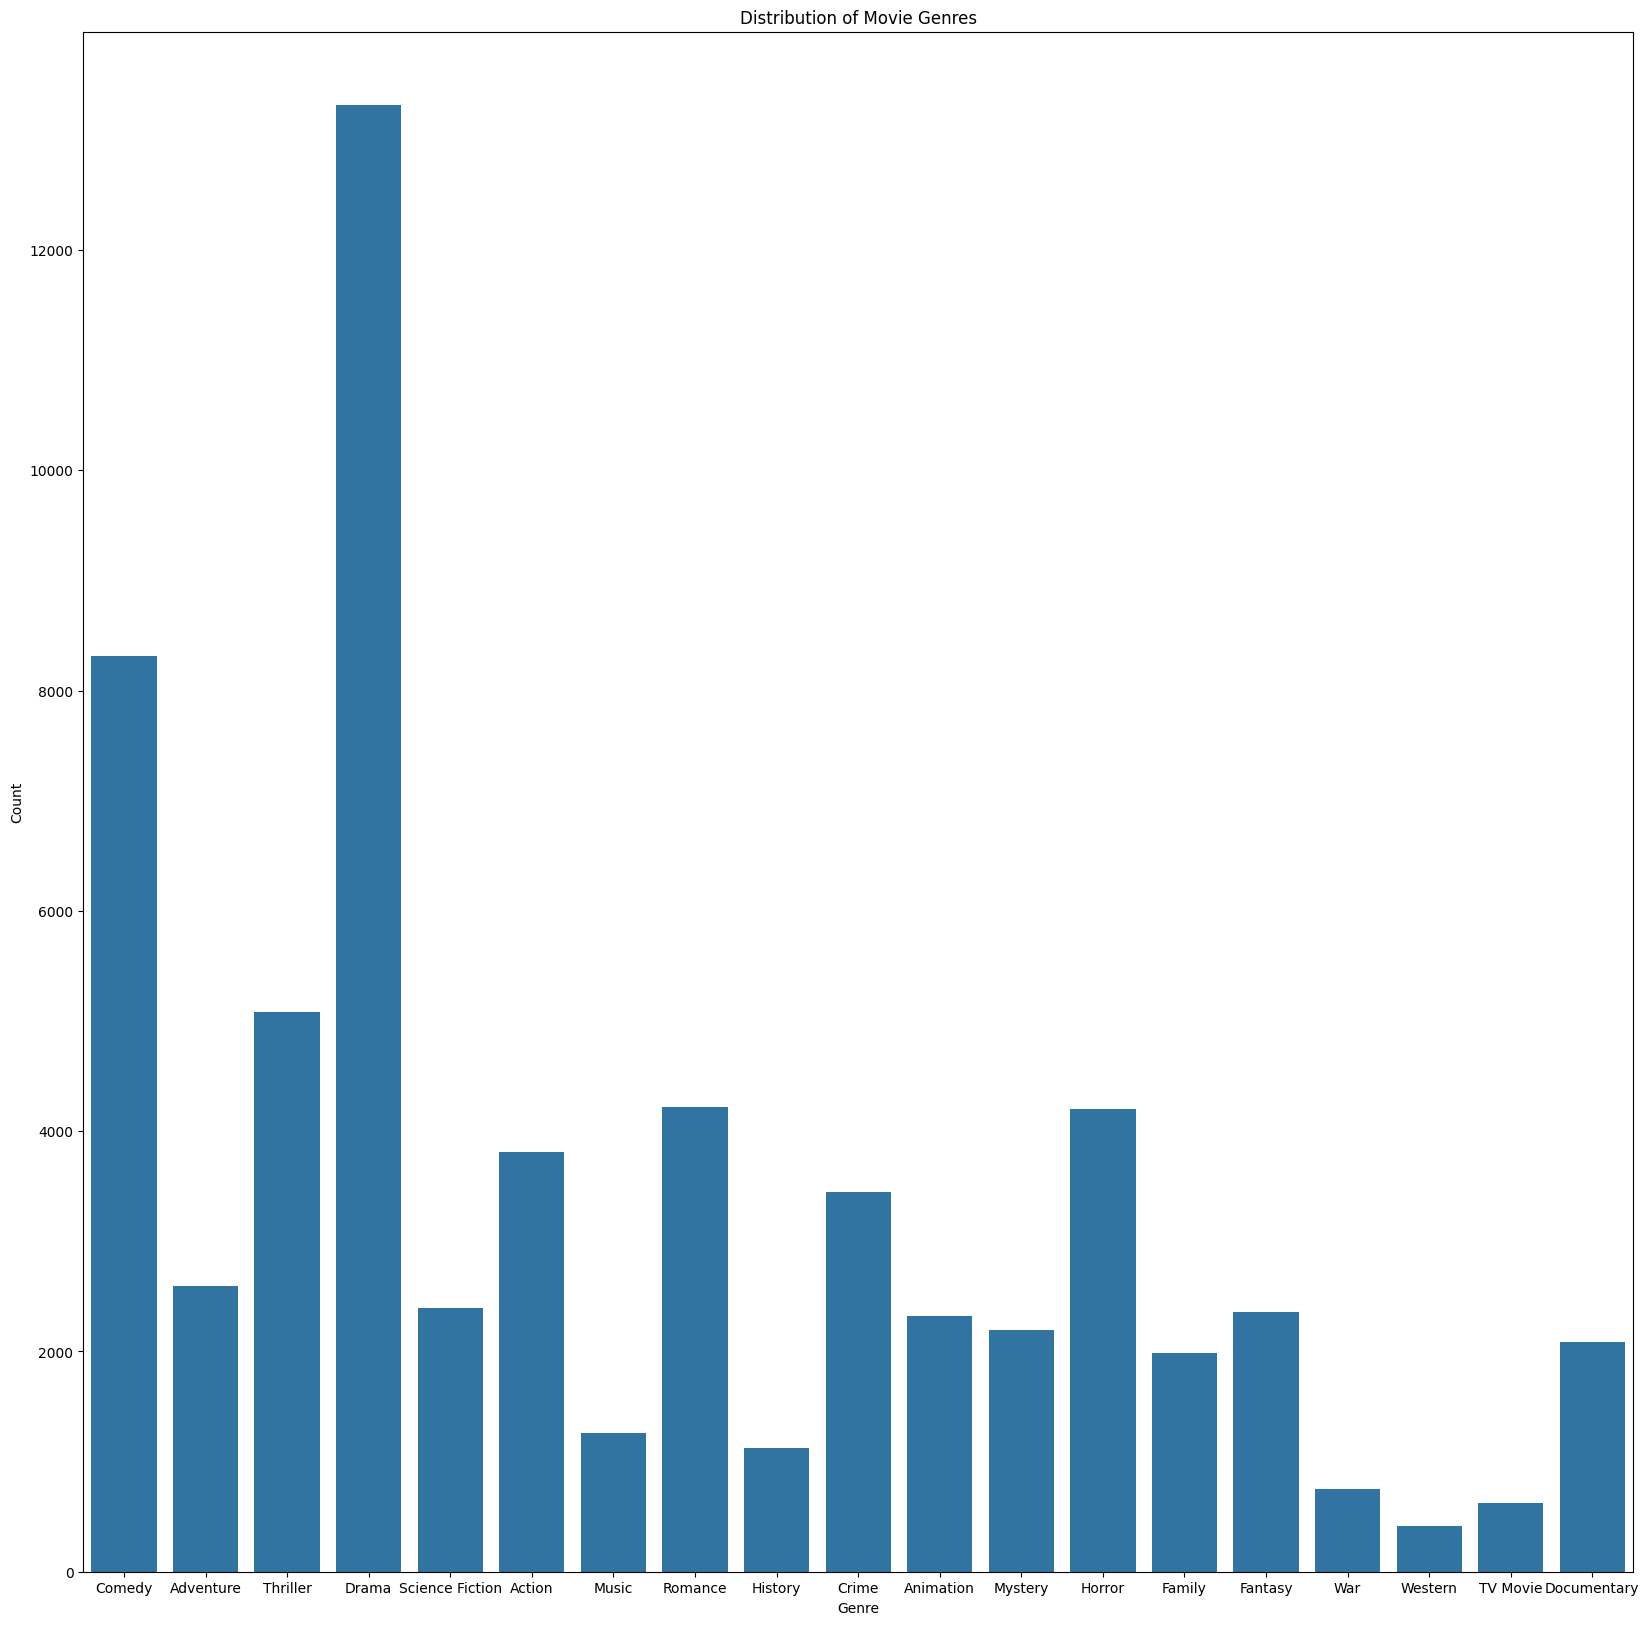

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(genre_count_df, x= 'genre', y= 'count') #https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.savefig('Distribution of Movie Genres.png', dpi = 300)

              genre  count
0            Comedy   8315
1         Adventure   2594
2          Thriller   5082
3             Drama  13317
4   Science Fiction   2391
5            Action   3813
6             Music   1259
7           Romance   4216
8           History   1127
9             Crime   3444
10        Animation   2319
11          Mystery   2199
12           Horror   4201
13           Family   1988
14          Fantasy   2357
15              War    747
16          Western    411
17         TV Movie    622
18      Documentary   2089


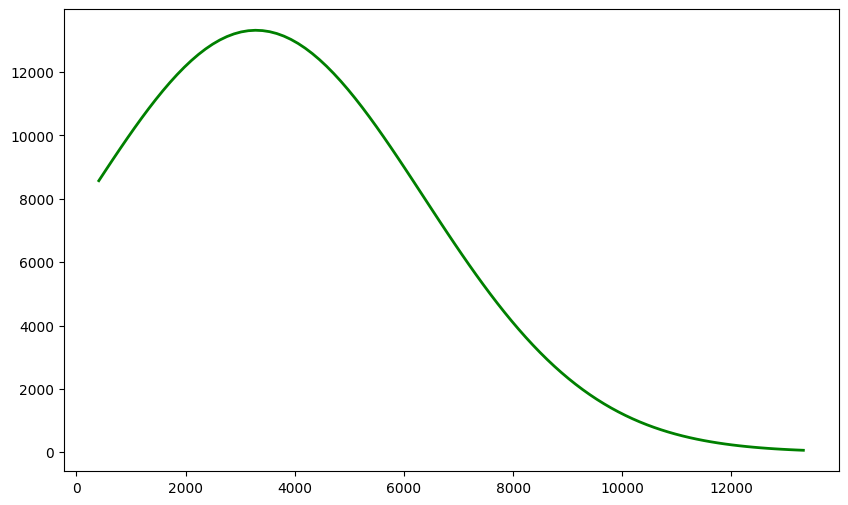

In [ ]:
#Pre-drop Gaussian
from scipy.stats import norm
genre_count_df['count'] = pd.to_numeric(genre_count_df['count'])
genre_count_df['genre'] = genre_count_df['genre'].astype('category')
mean = genre_count_df['count'].mean()
std = genre_count_df['count'].std()

xmin, xmax = genre_count_df['count'].min(), genre_count_df['count'].max() #the largest and smallest values of counts in the x axis
x = np.linspace(xmin, xmax, 100) #creating spaces
p = norm.pdf(x, mean, std) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html (PDF: Probability Density Function)

p_scaled = p * max(genre_count_df['count']) / max(p) #scaling it to fit the figure

plt.figure(figsize=(10,6))
plt.plot(x, p_scaled, 'g', linewidth =2)
print(genre_count_df)

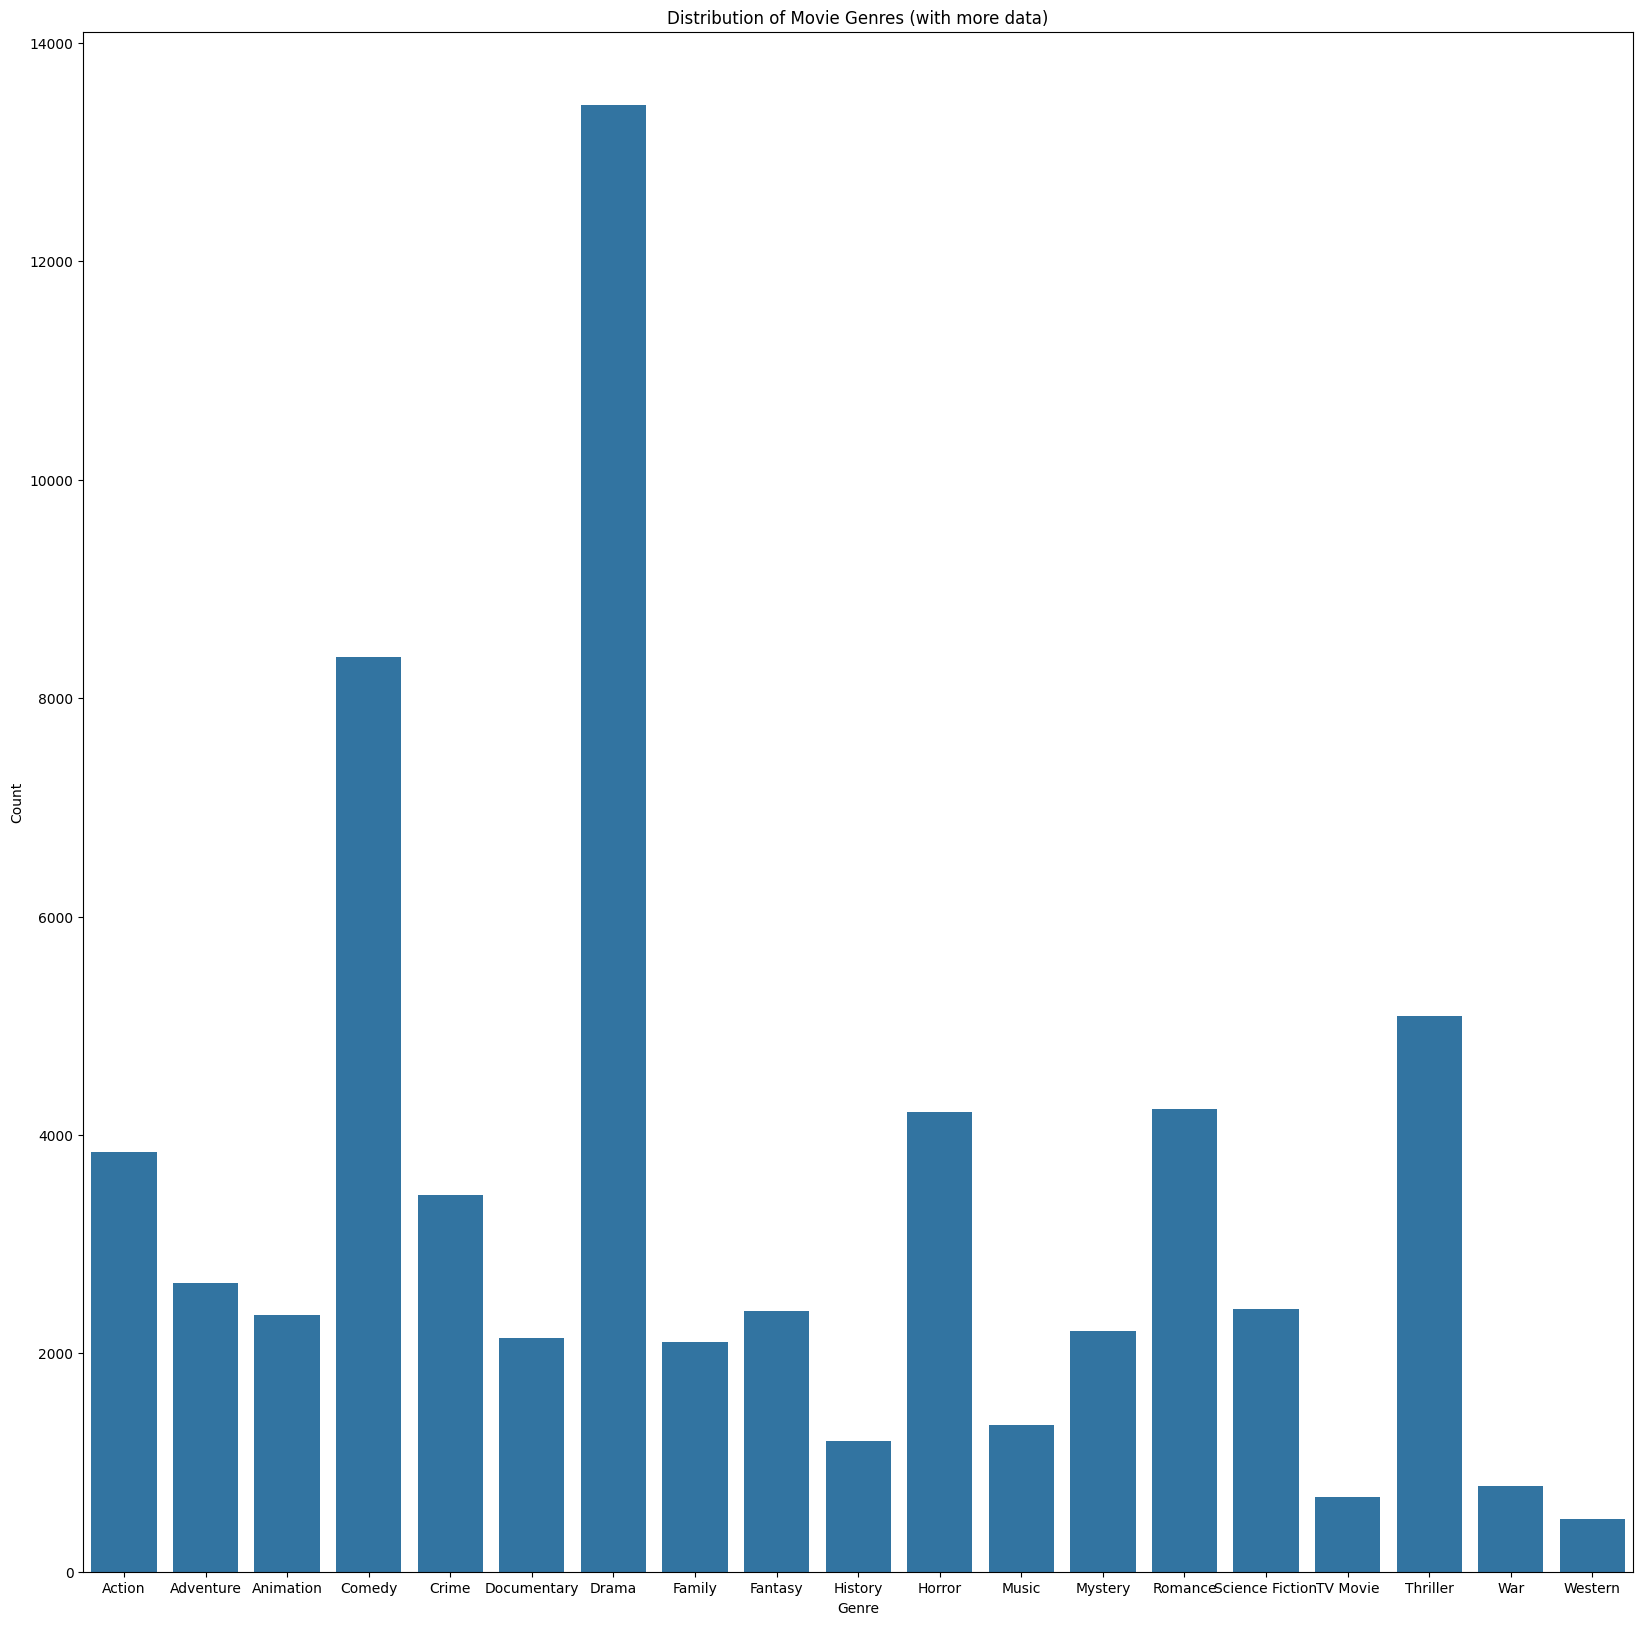

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(full_dataset_df, x= 'genre', y= 'count') #https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.title('Distribution of Movie Genres (with more data)')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.savefig('Distribution of Movie Genres (with more data).png', dpi = 300)

              genre  count
0            Comedy   8315
1         Adventure   2594
2          Thriller   5082
3             Drama  13317
4   Science Fiction   2391
5            Action   3813
6             Music   1259
7           Romance   4216
8           History   1127
9             Crime   3444
10        Animation   2319
11          Mystery   2199
12           Horror   4201
13           Family   1988
14          Fantasy   2357
15              War    747
16          Western    411
17         TV Movie    622
18      Documentary   2089


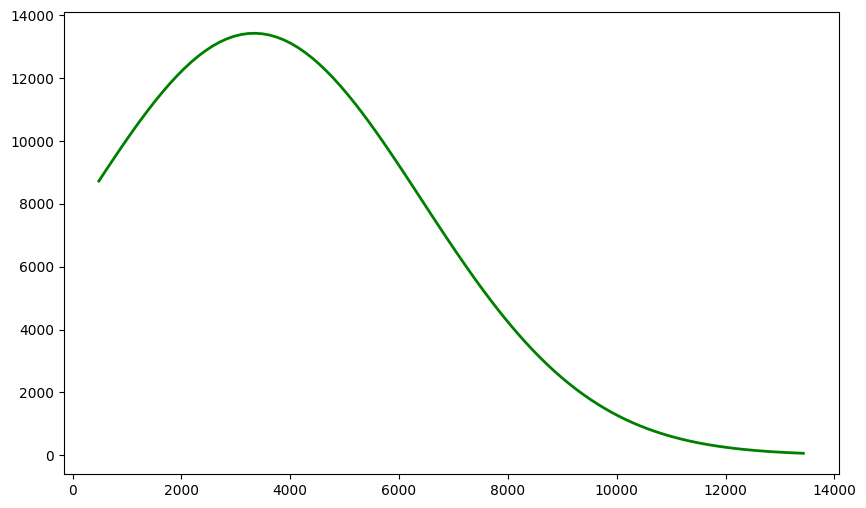

In [ ]:
from scipy.stats import norm
full_dataset_df['count'] = pd.to_numeric(full_dataset_df['count'])
full_dataset_df = full_dataset_df.reset_index()
full_dataset_df['genre'] = full_dataset_df['genre'].astype('category')
mean = full_dataset_df['count'].mean()
std = full_dataset_df['count'].std()

xmin, xmax = full_dataset_df['count'].min(), full_dataset_df['count'].max() #the largest and smallest values of counts in the x axis
x = np.linspace(xmin, xmax, 100) #creating spaces
p = norm.pdf(x, mean, std) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html (PDF: Probability Density Function)

p_scaled = p * max(full_dataset_df['count']) / max(p) #scaling it to fit the figure

plt.figure(figsize=(10,6))
plt.plot(x, p_scaled, 'g', linewidth =2)
print(genre_count_df)

In [ ]:
print(full_dataset_df.columns)

Index(['genre', 'count'], dtype='object')


In [ ]:
movies_dropped_na=movies_df.dropna()
movies_dropped_na


,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
27060,1027061,The Human Factor,1979.0,Every man in love is a potential traitor.,A low-ranking Secret Service agent is conned i...,115.0,3.33
27061,1027062,The Pink Phink,1964.0,Remember me? First I was a movie title... Now ...,A house painter can't understand why everythin...,7.0,3.89
27062,1027063,The Last Warning,1928.0,Who killed John Woodford?,"A producer decides to reopen a theater, that h...",89.0,3.44
27063,1027064,When Strangers Marry,1944.0,DYNAMIC!,A naive small-town girl comes to New York City...,67.0,3.15


In [ ]:
#Using merged_df
merged_df_removed_NA = merged_df.dropna()
merged_df_removed_NA

,id,name,date,tagline,description,minute,rating,genre
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]"
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]"
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]"
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama]
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]"
...,...,...,...,...,...,...,...,...
27060,1027061,The Human Factor,1979.0,Every man in love is a potential traitor.,A low-ranking Secret Service agent is conned i...,115.0,3.33,[Thriller]
27061,1027062,The Pink Phink,1964.0,Remember me? First I was a movie title... Now ...,A house painter can't understand why everythin...,7.0,3.89,"[Family, Comedy, Animation]"
27062,1027063,The Last Warning,1928.0,Who killed John Woodford?,"A producer decides to reopen a theater, that h...",89.0,3.44,"[Thriller, Horror, Mystery]"
27063,1027064,When Strangers Marry,1944.0,DYNAMIC!,A naive small-town girl comes to New York City...,67.0,3.15,"[Mystery, Crime, Drama]"


In [ ]:
# Final DF (just descriptions and genres)
final_df = merged_df_removed_NA[['description', 'genre']]
#final_df = final_df[~final_df['genre'].apply(lambda x: 'War' in x)]
#final_df = final_df[~final_df['genre'].apply(lambda x: 'Western' in x)]
#final_df = final_df[~final_df['genre'].apply(lambda x: 'TV Movie' in x)]
final_df = final_df.copy()
final_df['description'] = final_df['description'].str.lower()
#description_column = final_df['description'] #calling this X
#genre_column = final_df['genre'] #calling this Y

final_df

,description,genre
0,barbie and ken are having the time of their li...,"[Comedy, Adventure]"
1,"all unemployed, ki-taek's family takes peculia...","[Comedy, Thriller, Drama]"
2,an aging chinese immigrant is swept up in an i...,"[Science Fiction, Adventure, Comedy, Action]"
3,a ticking-time-bomb insomniac and a slippery s...,[Drama]
4,"mia, an aspiring actress, serves lattes to mov...","[Drama, Comedy, Music, Romance]"
...,...,...
27060,a low-ranking secret service agent is conned i...,[Thriller]
27061,a house painter can't understand why everythin...,"[Family, Comedy, Animation]"
27062,"a producer decides to reopen a theater, that h...","[Thriller, Horror, Mystery]"
27063,a naive small-town girl comes to new york city...,"[Mystery, Crime, Drama]"


In [ ]:
extra_dataset_final = extra_dataset[['overview', 'genre_names']]
extra_dataset_final.columns = ['description', 'genre']
extra_dataset_final = extra_dataset_final.copy()
extra_dataset_final['description'] = extra_dataset_final['description'].str.lower()
extra_dataset_final

,description,genre
0,the harper wagon train is carrying money and b...,[Western]
1,tom horn is known throughout the cow country a...,[Western]
3,a man named tony is captured riding the horse ...,[Western]
4,one of john waters' two tim mccoy westerns mad...,[Western]
5,"in the western town of coal ridge, a deputy ke...","[Western, Comedy]"
...,...,...
395,the children of the avengers hone their powers...,"[Animation, Family, Action, Adventure, Science..."
396,a telepathic dog enlists a group of fun loving...,"[Family, Adventure]"
397,when the buddies stumble upon the five power r...,"[Family, Comedy]"
398,"the tween, mads, finds it hard to fit in. havi...","[Comedy, Family]"


In [ ]:
df = pd.concat([final_df, extra_dataset_final])
df

,description,genre
0,barbie and ken are having the time of their li...,"[Comedy, Adventure]"
1,"all unemployed, ki-taek's family takes peculia...","[Comedy, Thriller, Drama]"
2,an aging chinese immigrant is swept up in an i...,"[Science Fiction, Adventure, Comedy, Action]"
3,a ticking-time-bomb insomniac and a slippery s...,[Drama]
4,"mia, an aspiring actress, serves lattes to mov...","[Drama, Comedy, Music, Romance]"
...,...,...
395,the children of the avengers hone their powers...,"[Animation, Family, Action, Adventure, Science..."
396,a telepathic dog enlists a group of fun loving...,"[Family, Adventure]"
397,when the buddies stumble upon the five power r...,"[Family, Comedy]"
398,"the tween, mads, finds it hard to fit in. havi...","[Comedy, Family]"


In [ ]:
genre_column = df['genre']

In [ ]:
#Multilabel Binarizer
genre_mlb = sklearn.preprocessing.MultiLabelBinarizer()
genre_mlb_array=genre_mlb.fit_transform(genre_column) #converts it into a vector of 0s and 1s

print(genre_mlb.classes_)
print(genre_mlb_array)


['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Mystery' 'Romance'
 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
genre_mlb_df = pd.DataFrame(genre_mlb_array, columns = genre_mlb.classes_)
genre_mlb_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17771,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
17772,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17773,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17774,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Data is unbalanced, going to use random undersampling for the majority classes (Drama, Comedy)
#https://medium.com/@tam.tamanna18/handling-imbalanced-datasets-in-python-methods-and-procedures-7376f99794de
from sklearn.utils import resample

#All classes
drama = genre_mlb_df[genre_mlb_df['Drama'] == 1]
comedy = genre_mlb_df[genre_mlb_df['Comedy'] == 1]
action = genre_mlb_df[genre_mlb_df['Action'] == 1]
adventure = genre_mlb_df[genre_mlb_df['Adventure'] == 1]
romance = genre_mlb_df[genre_mlb_df['Romance'] == 1]
horror = genre_mlb_df[genre_mlb_df['Horror'] == 1]
thriller = genre_mlb_df[genre_mlb_df['Thriller'] == 1]
fantasy = genre_mlb_df[genre_mlb_df['Fantasy'] == 1]
animation = genre_mlb_df[genre_mlb_df['Animation'] == 1]
war = genre_mlb_df[genre_mlb_df['War'] == 1]
western = genre_mlb_df[genre_mlb_df['Western'] == 1]
tv_movie = genre_mlb_df[genre_mlb_df['TV Movie'] == 1]
documentary = genre_mlb_df[genre_mlb_df['Documentary'] == 1]
history = genre_mlb_df[genre_mlb_df['History'] == 1]
science_fiction = genre_mlb_df[genre_mlb_df['Science Fiction'] == 1]
music = genre_mlb_df[genre_mlb_df['Music'] == 1]
crime = genre_mlb_df[genre_mlb_df['Crime'] == 1]
mystery = genre_mlb_df[genre_mlb_df['Mystery'] == 1]
family = genre_mlb_df[genre_mlb_df['Family'] == 1]

drama_downsampled = resample(drama, replace = False, n_samples= len(action), random_state= 42)
comedy_downsampled = resample(comedy, replace = False, n_samples= len(action), random_state= 42)

western_upsampled = resample(western, replace =True, n_samples= len(action), random_state= 42)
tv_movie_upsampled = resample(tv_movie, replace =True, n_samples= len(action), random_state= 42)
war_upsampled = resample(war, replace =True, n_samples= len(action), random_state= 42)
history_upsampled = resample(history, replace =True, n_samples= len(action), random_state= 42)
family_upsampled = resample(family, replace =True, n_samples= len(action), random_state= 42)
music_upsampled = resample(music, replace =True, n_samples= len(action), random_state= 42)

In [ ]:
balanced_data = pd.concat([drama_downsampled, comedy_downsampled, western_upsampled, tv_movie_upsampled, war_upsampled, history_upsampled, family_upsampled, action, adventure, romance, horror, thriller, fantasy, animation, documentary, science_fiction, crime, music_upsampled, crime, mystery])
balanced_data

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1728,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4701,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
8734,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6459,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8312,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17500,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0
17503,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
17509,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
17511,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
balanced_desc_index = balanced_data.index
balanced_desc_index.tolist()
balanced_desc = df.iloc[balanced_desc_index.tolist()]['description']
balanced_genres = balanced_data
balanced_desc = balanced_desc.reset_index(drop = True)
balanced_genres = balanced_genres.reset_index(drop = True)

In [ ]:
genre_y = balanced_genres.values
genre_y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
full_df = pd.concat([balanced_desc, balanced_genres], axis = 1)
full_df

,description,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"during a shootout in a saloon, sheriff hunt in...",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,the story of nobel prize winner marie curie an...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,beautiful half-breed pearl chavez becomes the ...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,an eccentric mountain man on the run from the ...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,an old-time crook plans a heist. when one of h...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52070,"in a mars base, the inhabitants are being infe...",0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0
52071,a district attorney is kidnapped by a criminal...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
52072,a psychotherapist who specializes in treating ...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
52073,handsome silver spoon texan trevor forrest can...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
description_column = full_df['description']


In [ ]:
y0 = full_df.drop(columns=['description'])
#y0 = y0.drop(columns = 'tokenized_descriptions').to_numpy()
y0

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52070,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0
52071,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
52072,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
52073,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
nltk.download("punkt") #divides text into a list of sentences
nltk.download("stopwords") #stopwords include "the", "a", "that", "in", etc.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Baseline Model (PyTorch LSTM)

#Make descriptions lowercase and tokenized: https://www.nltk.org/api/nltk.tokenize.word_tokenize.html
full_df['description'] = full_df['description'].str.lower()
full_df['tokenized_descriptions'] = full_df['description'].apply(word_tokenize)

desc_tokens = full_df['tokenized_descriptions']

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Reference: https://sharmasaravanan.medium.com/text-generation-using-lstm-a-step-by-step-guide-9b787467f9de
tokenizer_0 = Tokenizer()
tokenizer_0.fit_on_texts(full_df['description'])
word_count = len(tokenizer_0.word_index) +1
print('Total word count: ',word_count)

#References from Medium.com
#https://saadsohail5104.medium.com/understanding-padding-in-nlp-types-and-when-to-use-them-bacae6cae401
seq = tokenizer_0.texts_to_sequences(full_df['description'])
print('There are ' ,len(seq), 'sequences generated')
max_sequence_length = max([len(x) for x in seq])
padded_sequences = np.array(pad_sequences(seq, max_sequence_length, padding = 'post', truncating = 'post'))

#similar to the genres, count them using Counter
#token_count_prep = [token for tokenized in desc_tokens for token in tokenized] #Flatten list so Counter can run each word and count
#token_count = Counter(token_count_prep)


Total word count:  39564
There are  52075 sequences generated


In [ ]:
#First sequence test
print(seq[0], seq[1])

[63, 2, 7410, 6, 2, 3186, 565, 678, 14167, 2, 1876, 799, 35, 5, 1, 2308, 108, 776, 5, 30, 6, 262, 35, 122, 23, 161, 3263, 188, 55, 1, 18791, 5, 2, 5415, 1524, 8, 362, 678, 4, 2, 476, 5, 7, 129, 128, 6, 244, 5, 1, 1427, 4, 7, 1446] [1, 52, 5, 7411, 1997, 3187, 2035, 13423, 4, 10, 980, 2739, 14168, 1, 9159, 5, 10, 471, 3, 217, 14169, 1, 9809, 4, 12632, 2153, 16, 659, 5, 10191, 353, 12, 1, 2482, 331]


In [ ]:
#First padded sequence test
print(padded_sequences[0])

[   63     2  7410     6     2  3186   565   678 14167     2  1876   799
    35     5     1  2308   108   776     5    30     6   262    35   122
    23   161  3263   188    55     1 18791     5     2  5415  1524     8
   362   678     4     2   476     5     7   129   128     6   244     5
     1  1427     4     7  1446     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [ ]:
x0 = padded_sequences
#Tensorflow documentation: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
#Returns the binary matrix representation of the padded sequences for y0 to predict the next word
#y0 = tf.keras.utils.to_categorical(y0, num_classes = word_count)

In [ ]:
#Hyperparameters
lr = 1e-10 #starting small
epochs = 20 #see if there is any convergence
input_size = len(tokenizer_0.word_index)+1 #adding 1 since it starts at index 0 https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index
hidden_size = 3 #Large dataset
output_size = 19 #19 genres

In [ ]:
input_size

39564

In [ ]:
#Convert to Tensor for PyTorch RNN Models
y0 = y0.to_numpy()

x0 = torch.tensor(x0, dtype = torch.float32)
y0 = torch.tensor(y0, dtype = torch.float32)


In [ ]:
#RNN Model https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
#https://www.geeksforgeeks.org/implementing-recurrent-neural-networks-in-pytorch/
#https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, embed_dim, batch_first = True):
    super(RNN, self).__init__()

    self.embed = nn.Embedding(input_size, embed_dim) #https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html
    self.rnn = nn.RNN(embed_dim, hidden_size)
    self.h2o = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.LogSoftmax(dim = 1) #using sigmoid for binary classification (converted it with MLB)

  def forward(self, x):
    embed = self.embed(x)
    rnn_out, _ = self.rnn(embed)
    output = self.sigmoid(self.h2o(rnn_out[:,-1,:]))
    return output

model0 = RNN(input_size, hidden_size, output_size, embed_dim = 300, batch_first = True)

In [ ]:
#Check shape to make sure it is good to go (and not raise errors)
print(x0.shape, y0.shape)

torch.Size([52075, 175]) torch.Size([52075, 19])


In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size= 0.2, random_state=42)

In [ ]:
x0_train = x0_train.long()
x0_test = x0_test.long()

In [ ]:
#Using Dataloader for training dataset (Using PyTorch Dataloader documentation example of Memory pinning: https://pytorch.org/docs/stable/data.html)
#Also using notes from class: Computervision Dataloaders
dataset = torch.utils.data.TensorDataset(x0_train, y0_train) #inputs are the x values, targets are the labels (genres)
train_loader = torch.utils.data.DataLoader(dataset, batch_size= 5, shuffle = True)
dataset_test = torch.utils.data.TensorDataset(x0_test, y0_test)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size = 5, shuffle = False)

In [ ]:
#F1 score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import f1_score


In [ ]:
#Optimizer and Loss
import torch.optim
optimizer = torch.optim.AdamW(model0.parameters(), lr=lr)
loss_fn = torch.nn.BCEWithLogitsLoss()

In [ ]:
#Training Loop for RNN Model (model0)
epoch = 50

#push data to device
x0_train, x0_test, y0_train, y0_test = x0_train.to(device), x0_test.to(device), y0_train.to(device), y0_test.to(device)
model0.to(device)
train_loss = []
train_batch_loss = 0
num_batches = 0
epoch_count = []
testing_f1 = []
test_loss = []
test_batch_loss = 0
epoch_count_train = []

for epoch in range(epoch):
  #Putting model to training mode
  model0.train()

  for x0_batch, y0_batch in train_loader:
    y0_batch = y0_batch.float()
    x0_batch, y0_batch = x0_batch.to(device), y0_batch.to(device)
    y_logits = model0(x0_batch)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y0_batch)
    train_batch_loss += loss.item()
    num_batches += 1

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    average_training_loss = sum(train_loss) / num_batches
    train_loss.append(average_training_loss)
    epoch_count_train.append(epoch)

  #testing mode
  model0.to(device)
  model0.eval()
  with torch.inference_mode():
    for x0_batch, y0_batch in test_loader:
        x0_batch, y0_batch = x0_batch.to(device), y0_batch.to(device)
        test_logits = model0(x0_batch)
        test_pred = torch.round(torch.sigmoid(test_logits))
        testing_loss = loss_fn(test_logits, y0_batch)
        test_batch_loss += testing_loss.item()

        #convert to numpy arrays for f1 score (need to flatten them from 2D to 1D in order to use f1 score)
        #stackoverflow.com/questions/73640393/precision-recall-f1-score-with-sklearn-on-pytorch
        y0_batch_np = y0_batch.cpu().detach().numpy().flatten()
        test_pred_np = test_pred.cpu().detach().numpy().flatten()
        f1_score_result = f1_score(y0_batch_np, test_pred_np, average = 'macro')


        epoch_count.append(epoch)
        testing_f1.append(f1_score_result)
        F1_score_for_output = sum(testing_f1) / len(testing_f1)

        #Average = sum/total
        average_testing_loss = test_batch_loss / num_batches
        test_loss.append(average_testing_loss)
  print(f'Epoch: {epoch}, Training Loss: {average_training_loss:.4f}, Testing Loss: {average_testing_loss:.4f}, F1 Score: {F1_score_for_output:.4f}')

Epoch: 0, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 1, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 2, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 3, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 4, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 5, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 6, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 7, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 8, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 9, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 10, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 11, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 12, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Score: 0.4573
Epoch: 13, Training Loss: 0.0000, Testing Loss: 0.1354, F1 Sc

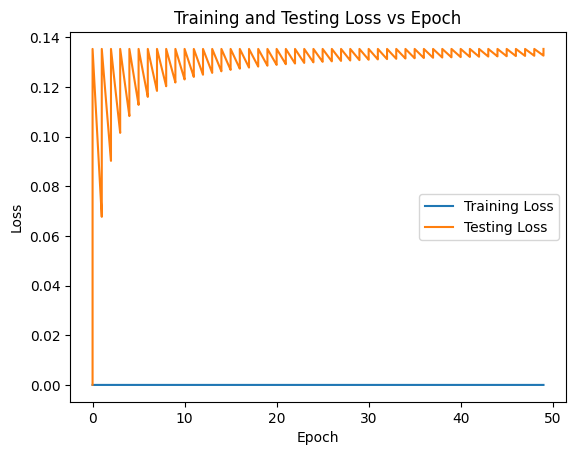

In [ ]:
plt.plot(epoch_count_train, train_loss, label="Training Loss")
plt.plot(epoch_count, test_loss, label = 'Testing Loss')

plt.title("Training and Testing Loss vs Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.savefig('Baseline Training & Testing Loss vs Epoch.png', dpi = 300)

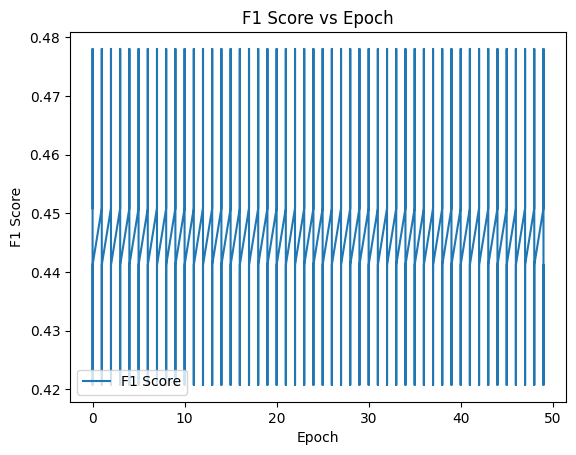

In [ ]:
plt.plot(epoch_count, testing_f1, label = 'F1 Score')

plt.title("F1 Score vs Epoch")
plt.ylabel("F1 Score")
plt.xlabel("Epoch")
plt.legend()

plt.savefig('F1 Score vs Epoch.png', dpi = 300)

In [ ]:
y = pd.DataFrame(y0)
y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52070,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
52071,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
52073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#BERT MODEL https://huggingface.co/google-bert/bert-base-uncased
#PDF: https://arxiv.org/pdf/1810.04805
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig

configuration = BertConfig()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 19)

#https://medium.com/data-science/a-complete-guide-to-bert-with-code-9f87602e4a11
#tokenize the training and testing data for the input (descriptions) -- turns them to 1's & 0's
#utilize tokenizer.encode() for large datsets
token_id = []
attention_masks = []
for description in description_column:
  batch_encoding = tokenizer.encode_plus(description, max_length = 512, padding = 'max_length', truncation = True, return_tensors = 'pt')
  token_id.append(batch_encoding['input_ids'])
  attention_masks.append(batch_encoding['attention_mask'])

#convert to tensors
token_ids = torch.cat(token_id, dim =0)
attention_masks = torch.cat(attention_masks, dim = 0)

#train/test split
from sklearn.model_selection import train_test_split
# Random state 42 for reproducibility, validation size of 10%
training_id, testing_id = train_test_split(token_ids, test_size = 0.1, shuffle = False)
training_mask, testing_mask = train_test_split(attention_masks, test_size = 0.1, shuffle = False)

label = torch.tensor(y.values)
training_label, testing_label = train_test_split(label, test_size = 0.1, shuffle = False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(training_id.shape, training_mask.shape, testing_label.shape)

torch.Size([46867, 512]) torch.Size([46867, 512]) torch.Size([5208, 19])


In [ ]:
#Creating Dataloader for BERT (similar to RNN model)
train_data = torch.utils.data.TensorDataset(training_id, training_mask, training_label)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size = 5, shuffle = True)

#Testing does not require shuffling
test_data = torch.utils.data.TensorDataset(testing_id, testing_mask, testing_label)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = 5, shuffle = False)

In [ ]:
optimizer1 = torch.optim.AdamW(model1.parameters(), lr= lr)
loss = torch.nn.CrossEntropyLoss()
epoch = 4
steps = epoch*len(train_dataloader)

from transformers import get_linear_schedule_with_warmup
scheduler = get_linear_schedule_with_warmup(optimizer1, num_warmup_steps=0, num_training_steps=steps)

In [77]:
epochs = 4
from sklearn.metrics import recall_score, accuracy_score

train1_loss = []
train1_batch_loss = 0
num_batches = 0
epoch_count = []
testing_f1 = []
test1_loss = []
test1_batch_loss = 0
epoch_count_train = []

model1.to(device)

for epoch in range(epochs):
  #set model to training mode
  model1.train()

  #Push training data to device
  for batch in train_dataloader:
    training_id_batch = batch[0].to(device)
    training_mask_batch = batch[1].to(device)
    training_label_batch = batch[2].to(device)

    model1.zero_grad()
    loss1 , logits1 = model1(training_id_batch, token_type_ids = None, attention_mask = training_mask_batch, labels = training_label_batch, return_dict =False)

    #Training Loss
    train1_batch_loss += loss1.item()
    loss1.backward()
    torch.nn.utils.clip_grad_norm_(model1.parameters(), 1.0)
    optimizer1.step()
    scheduler.step()

    average_train1_loss = train1_batch_loss / len(train_dataloader)
    train1_loss.append(average_train1_loss)
    epoch_count_train.append(epoch)


#testing loop (similar to training loop)
#putting model to eval mode
  model1.eval()
  for batch in test_dataloader:
    testing_id_batch = batch[0].to(device)
    testing_mask_batch = batch[1].to(device)
    testing_label_batch = batch[2].to(device)

    with torch.no_grad():
      (loss1 , logits1) = model1(testing_id_batch, token_type_ids = None, attention_mask = testing_mask_batch, labels = testing_label_batch, return_dict =False)
      test1_batch_loss += loss1.item()
#similar to RNN model (apply sigmoid to logits):
    pred = torch.sigmoid(logits1).cpu().detach().numpy()
    #https://discuss.pytorch.org/t/multi-label-classification-in-pytorch/905/10
    y_pred = (pred > 0.5).astype(int)
    label_ids = testing_label_batch.to('cpu').numpy()

    f1_score_BERT = f1_score(y_pred.flatten(), label_ids.flatten(), average = 'macro')


    epoch_count.append(epoch)
    testing_f1.append(f1_score_BERT)
    F1_score_BERT = sum(testing_f1) / len(testing_f1)

    #Average = sum/total
    average_testing_loss1 = test1_batch_loss / len(test_dataloader)
    test1_loss.append(average_testing_loss1)
  print(f'Epoch: {epoch}, Training Loss: {average_train1_loss:.4f}, Testing Loss: {average_testing_loss1:.4f}, F1 Score: {F1_score_BERT:.4f}')

Epoch: 0, Training Loss: 0.6965, Testing Loss: 0.6749, F1 Score: 0.5181
Epoch: 1, Training Loss: 1.3931, Testing Loss: 1.3499, F1 Score: 0.5181
Epoch: 2, Training Loss: 2.0896, Testing Loss: 2.0248, F1 Score: 0.5181
Epoch: 3, Training Loss: 2.7861, Testing Loss: 2.6997, F1 Score: 0.5181


In [ ]:
#Testing lengths -- good to go
len(test1_loss), len(epoch_count)

In [ ]:
plt.plot(epoch_count_train, train1_loss, label="Training Loss")
plt.plot(epoch_count, test1_loss, label = 'Testing Loss')

plt.title("Training and Testing Loss vs Epoch (BERT)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.savefig('BERT Training & Testing Loss vs Epoch.png', dpi = 300)

In [ ]:
plt.plot(epoch_count, testing_f1, label = 'F1 Score')

plt.title("F1 Score vs Epoch (BERT)")
plt.ylabel("F1 Score")
plt.xlabel("Epoch")
plt.legend()

plt.savefig('BERT F1 Score vs Epoch.png', dpi = 300)